# **HEALTHCARE PROFESSIONALS PREDICTION MODEL**


# DATA PREPARATION

---



In [112]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [113]:
# Creating dataframe using training dataset
df = pd.read_csv('Train.csv',encoding='cp1252')

In [114]:
# Checking no. of rows and column : (rows,cols)
df.shape

(113937, 14)

In [115]:
df.head()

,ID,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERCITY,USERZIPCODE,USERAGENT,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS,TAXONOMY,IS_HCP
0,1001,Desktop,2,170.173.0.22,6974dcaa-f932-480e-9fb5-c52e20e1393a,Portland,97206.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/canc...,General|Endocrine|False|Medicine|Surgery|Urolo...,NaN,0.0
1,1002,Desktop,2,65.216.253.25,c12f3f8f-8fcf-484a-90e1-1ac04db8cdcf,Arlington,22202.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/deci...,Bone Marrow|Radiography|Chronic|Oncology|Psych...,NaN,0.0
2,1003,Desktop,2,66.232.79.22,a698de4b-e200-46dd-b5fb-40402175ae18,New Meadows,83654.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/canc...,General|Endocrine|False|Medicine|Surgery|Urolo...,NaN,0.0
3,1004,Desktop,3,137.54.125.246,45967533-75c8-4fbd-a00c-e6ff20447aaa,NaN,229114624.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://globalrph.com/medcalcs/warfarin-mainte...,Dental|Total|Clinical|Pharmacology|Physicians|...,2084P0800X,1.0
4,1005,Mobile,7,174.202.231.99,a17e25be-532d-4cf5-b916-9308c8c3961f,Houston,77008.0,Mozilla/5.0 (iPhone; CPU iPhone OS 16_1_1 like...,Online Medical Journal,Website,https://www.cureus.com/articles/58184-a-review...,Critical Care|Emergency Medicine|General Pract...,NaN,0.0


In [116]:
df.tail()

,ID,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERCITY,USERZIPCODE,USERAGENT,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS,TAXONOMY,IS_HCP
113932,114933,Desktop,2,68.82.97.126,051e4a06-4cb4-4b97-b0b1-d1c6a2b8e2c2,Philadelphia,19120.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_6...,Online Medical Journal,Website,https://www.clinicaladvisor.com/home/consultat...,Cardiovascular|Clinical|False|Male|Oncology|Ps...,207RP1001X,1.0
113933,114934,Desktop,2,104.172.11.109,3289bba5-4a50-4b61-a5cc-68596bbdc2bf,Van Nuys,914014213.0,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,Online Medical Journal,Website,https://www.clinicaladvisor.com/home/features/...,Asthma|Arthritis|General|Clinical|Diagnosis|Rh...,2084P0800X,1.0
113934,114935,Desktop,7,174.21.94.113,9c36e90c-caa7-4323-8431-fb84f8293972,NaN,98105.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cureus.com/articles/39455-whats-th...,Rehabilitation|Transplantation|Clinical|Preven...,208000000X,1.0
113935,114936,Mobile,2,69.253.129.131,afc27760-31f7-4f6e-aa08-90d8a96525d0,Wilmington,19808.0,Mozilla/5.0 (iPhone; CPU iPhone OS 15_6_1 like...,Online Medical Journal,Website,https://www.dermatologyadvisor.com/home/topics...,pain|disease|autoimmune|multiple sclerosis|gra...,2084P0800X,1.0
113936,114937,Mobile,2,108.41.233.175,d26887c5-15f9-4b72-80dc-728039529e60,White Plains,10605.0,Mozilla/5.0 (iPhone; CPU iPhone OS 16_1 like M...,Online Medical Journal,Website,https://www.medicalbag.com/,Genetic|Large|Autoimmune|Health|False|Abortion...,2084P0800X,1.0


In [117]:
df.isnull().sum()

ID                     0
DEVICETYPE             0
PLATFORM_ID            0
BIDREQUESTIP           0
USERPLATFORMUID        4
USERCITY            6359
USERZIPCODE         4592
USERAGENT              2
PLATFORMTYPE           0
CHANNELTYPE            0
URL                    0
KEYWORDS               0
TAXONOMY           81624
IS_HCP                 1
dtype: int64

In [118]:
df1  = df.drop(columns='TAXONOMY')
df1.isnull().sum()

ID                    0
DEVICETYPE            0
PLATFORM_ID           0
BIDREQUESTIP          0
USERPLATFORMUID       4
USERCITY           6359
USERZIPCODE        4592
USERAGENT             2
PLATFORMTYPE          0
CHANNELTYPE           0
URL                   0
KEYWORDS              0
IS_HCP                1
dtype: int64

In [119]:
# Handling missing values of user city column.
a = df1.USERCITY.mode()
df1['USERCITY'] = df1['USERCITY'].fillna('New York')

In [120]:
# Handling missing values for user zip code column.
df1.USERZIPCODE.mean()
df1['USERZIPCODE'] = df1['USERZIPCODE'].fillna(df1.USERZIPCODE.mean())

In [121]:
# Handling missing values for user platform id.
df1.USERPLATFORMUID.mode()
df1['USERPLATFORMUID'] = df1['USERPLATFORMUID'].fillna('3e2578c8-f794-41af-a38c-c5cfb3c0f014')

In [122]:
# Handling missing values for user agent.
df1.USERAGENT.mode()
df1['USERAGENT'] = df1['USERAGENT'].fillna('Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...')

In [123]:
# Handling missing values for IS_HCP column.
df1.IS_HCP.mode()
df1['IS_HCP'] = df1['IS_HCP'].fillna(0.0)

In [124]:
df1.isnull().sum()

ID                 0
DEVICETYPE         0
PLATFORM_ID        0
BIDREQUESTIP       0
USERPLATFORMUID    0
USERCITY           0
USERZIPCODE        0
USERAGENT          0
PLATFORMTYPE       0
CHANNELTYPE        0
URL                0
KEYWORDS           0
IS_HCP             0
dtype: int64

In [125]:
from sklearn.preprocessing import LabelEncoder
col1 = LabelEncoder()
col2 = LabelEncoder()
col3 = LabelEncoder()
col4 = LabelEncoder()
col5 = LabelEncoder()
col6 = LabelEncoder()
col7 = LabelEncoder()
col8 = LabelEncoder()
col9 = LabelEncoder()

In [126]:
df1['DEVICETYPE'] = col1.fit_transform(df1['DEVICETYPE'])
df1['BIDREQUESTIP'] = col1.fit_transform(df1['BIDREQUESTIP'])
df1['USERPLATFORMUID'] = col1.fit_transform(df1['USERPLATFORMUID'])
df1['USERCITY'] = col1.fit_transform(df1['USERCITY'])
df1['USERAGENT'] = col1.fit_transform(df1['USERAGENT'])
df1['PLATFORMTYPE'] = col1.fit_transform(df1['PLATFORMTYPE'])
df1['CHANNELTYPE'] = col1.fit_transform(df1['CHANNELTYPE'])
df1['URL'] = col1.fit_transform(df1['URL'])
df1['KEYWORDS'] = col1.fit_transform(df1['KEYWORDS'])

In [127]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ID               113937 non-null  int64  
 1   DEVICETYPE       113937 non-null  int32  
 2   PLATFORM_ID      113937 non-null  int64  
 3   BIDREQUESTIP     113937 non-null  int32  
 4   USERPLATFORMUID  113937 non-null  int32  
 5   USERCITY         113937 non-null  int32  
 6   USERZIPCODE      113937 non-null  float64
 7   USERAGENT        113937 non-null  int32  
 8   PLATFORMTYPE     113937 non-null  int32  
 9   CHANNELTYPE      113937 non-null  int32  
 10  URL              113937 non-null  int32  
 11  KEYWORDS         113937 non-null  int32  
 12  IS_HCP           113937 non-null  float64
dtypes: float64(2), int32(9), int64(2)
memory usage: 7.4 MB


In [128]:
x = df1.drop(columns = ['IS_HCP','ID'])
y = df1.IS_HCP

In [129]:
x.shape

(113937, 11)

In [183]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.025, random_state=36)

In [172]:
X_train.shape

(111088, 11)

In [173]:
y_train.shape

(111088,)

In [174]:
X_train.tail()

,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERCITY,USERZIPCODE,USERAGENT,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS
60962,0,2,28232,28697,2171,13088.0,2782,3,0,1030,565
10749,0,7,19104,34494,535,2138.0,2662,3,0,1747,85
104684,0,2,30701,6462,3651,93063.0,2872,3,0,4109,1355
97651,0,2,349,9073,284,28012.0,2845,3,0,1006,1472
90069,0,2,9241,13671,2264,7940.0,2820,3,0,852,68


# EXPLORATORY DATA ANALYSIS

---




In [159]:
# Getting a brief statistical description of dataframe df.
df.describe()

,ID,PLATFORM_ID,USERZIPCODE,IS_HCP
count,113937.000000,113937.000000,1.093450e+05,113936.000000
mean,57969.000000,3.574993,1.830240e+07,0.299993
std,32890.923148,2.569019,1.066908e+08,0.458257
min,1001.000000,1.000000,6.020000e+02,0.000000
25%,29485.000000,2.000000,1.935500e+04,0.000000
50%,57969.000000,2.000000,4.321000e+04,0.000000
75%,86453.000000,6.000000,7.709000e+04,1.000000
max,114937.000000,16.000000,9.970149e+08,1.000000


In [160]:
df.groupby('DEVICETYPE').IS_HCP.value_counts()

DEVICETYPE  IS_HCP
Desktop     0.0       57161
            1.0       21262
Mobile      0.0       20796
            1.0       11268
Tablet      0.0        1775
            1.0        1650
Unknown     0.0          24
Name: IS_HCP, dtype: int64

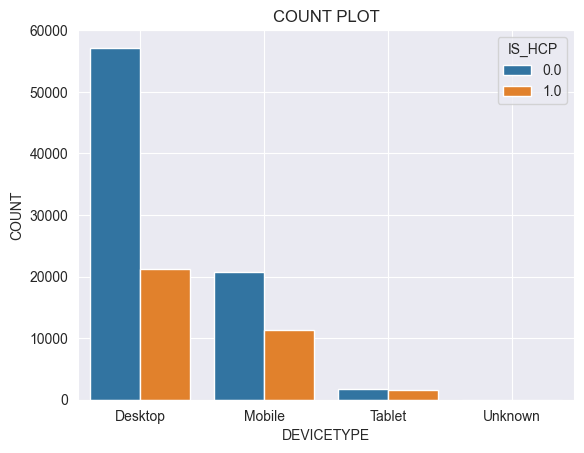

In [161]:
sns.set_style('dark')
sns.countplot(x='DEVICETYPE',data=df,hue='IS_HCP')
plt.title('COUNT PLOT')
plt.ylabel('COUNT')
plt.grid()

In [162]:
df.groupby('CHANNELTYPE').IS_HCP.value_counts()

CHANNELTYPE  IS_HCP
Website      0.0       79756
             1.0       34180
Name: IS_HCP, dtype: int64

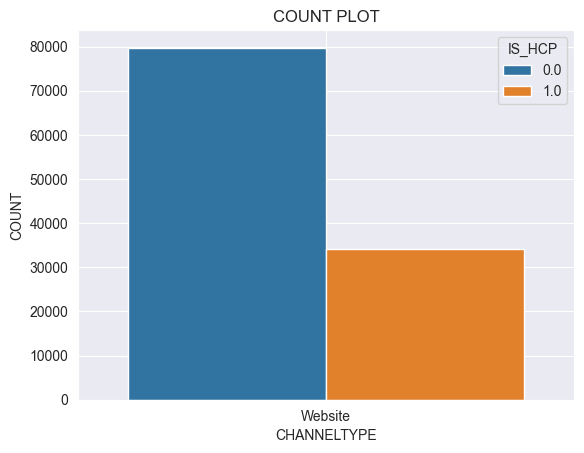

In [163]:
sns.set_style('dark')
sns.countplot(x='CHANNELTYPE',data=df,hue='IS_HCP')
plt.title('COUNT PLOT')
plt.ylabel('COUNT')
plt.grid()

In [164]:
df.groupby('PLATFORMTYPE').IS_HCP.value_counts()

PLATFORMTYPE              IS_HCP
Electronic Health Record  0.0          31
                          1.0           9
Medical News Platform     1.0         798
Online Learning Portal    0.0        2032
                          1.0         946
Online Medical Journal    0.0       77692
                          1.0       32427
Tele-medicine Platform    0.0           1
Name: IS_HCP, dtype: int64

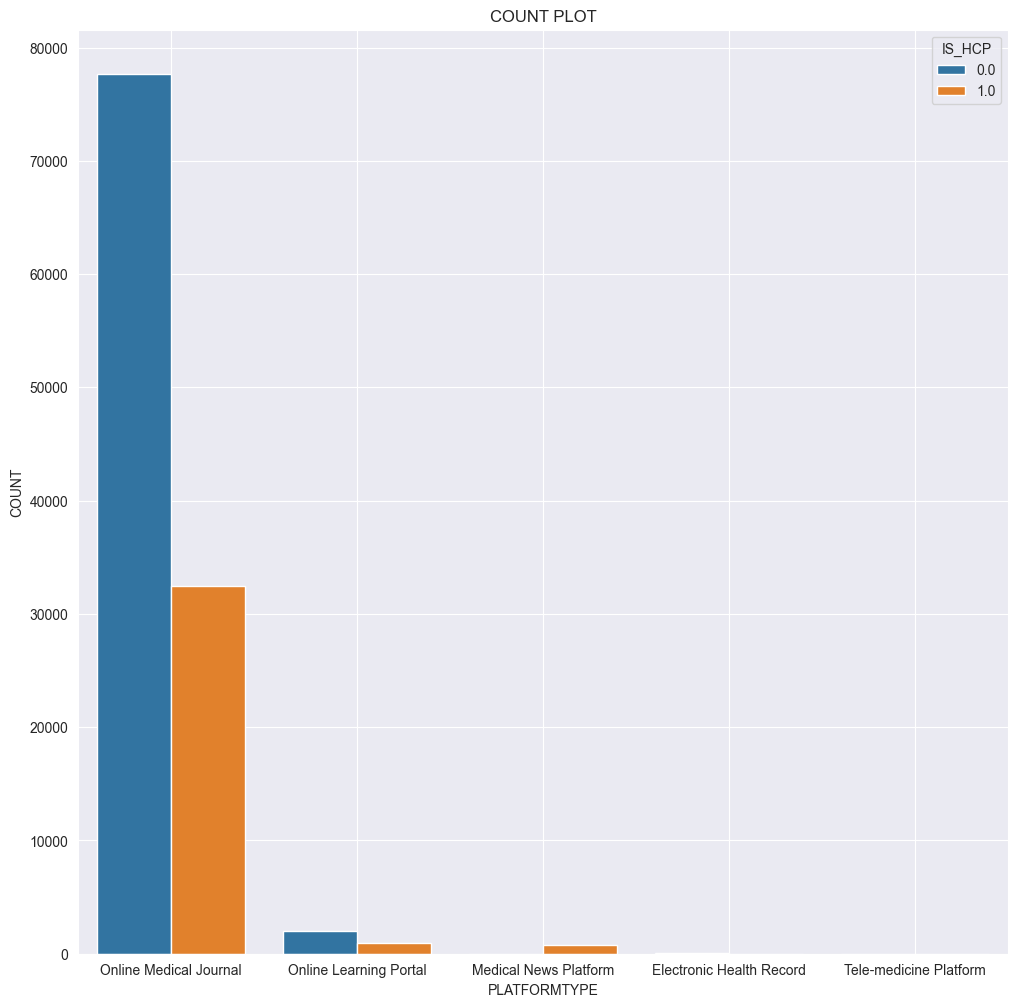

In [165]:
plt.figure(figsize=(12,12))
sns.set_style('dark')
sns.countplot(x='PLATFORMTYPE',data=df,hue='IS_HCP')
plt.title('COUNT PLOT')
plt.ylabel('COUNT')
plt.grid()

In [166]:
df.groupby('USERCITY').IS_HCP.value_counts()

USERCITY     IS_HCP
Aiea        0.0        7
             1.0        2
'Ewa Beach   0.0        6
             1.0        3
Abbeville    0.0        4
                       ..
Zephyrhills  0.0        2
Zion         0.0        2
             1.0        2
Zionsville   1.0       15
             0.0        5
Name: IS_HCP, Length: 6636, dtype: int64

# DATA MODELLING

---





In [184]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV

In [185]:
model = DecisionTreeClassifier()

In [186]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [187]:
model.score(X_test,y_test)

0.9912249912249912

In [188]:
model.score(X_train,y_train)

1.0

**Since we have used Decision Tree Classifier which has high variance we can apply ensemble technique like Bagging to overcome high variance.**

In [191]:
# Now we will boost accuracy using some ensemble techniques
model2 = BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=3000,max_samples=1.0,random_state=True)

In [192]:
model2.fit(X_train,y_train)

E:\Program Files\python\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=3000,
                  random_state=True)

In [193]:
model2.score(X_test,y_test)*100

99.54369954369955

# MODEL EVALUATION

In [195]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [196]:
y_predicted = model2.predict(X_test)

In [197]:
report = classification_report(y_test,y_predicted,output_dict=True)

In [198]:
classification_report = pd.DataFrame(report).transpose()

In [199]:
classification_report

,precision,recall,f1-score,support
0.0,0.995042,0.998507,0.996772,2010.000000
1.0,0.996394,0.988081,0.992220,839.000000
accuracy,0.995437,0.995437,0.995437,0.995437
macro avg,0.995718,0.993294,0.994496,2849.000000
weighted avg,0.995440,0.995437,0.995431,2849.000000


In [200]:
mean_squared_error(y_test,y_predicted)

0.004563004563004563

In [201]:
mean_absolute_error(y_test,y_predicted)

0.004563004563004563

# PREDICTION

In [202]:
import pandas as pd

In [203]:
df4 = pd.read_csv('Test.csv',encoding='cp1252')

In [204]:
df4.head()

,ID,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERCITY,USERZIPCODE,USERAGENT,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS
0,115501,Desktop,2.0,75.189.231.103,0d5041ff-f0b6-4d1a-9ad7-0a29f7d485b4,Fayetteville,28305.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6...,Online Medical Journal,Website,https://www.clinicaladvisor.com/home/features/...,Family Practice|Drainage|Clinical|Dermatology|...
1,115502,Mobile,2.0,24.101.33.158,c8396dd0-969f-4d99-a40b-b7bb1f516154,Conneaut Lake,16316.0,Mozilla/5.0 (iPhone; CPU iPhone OS 15_6_1 like...,Online Medical Journal,Website,https://www.ophthalmologyadvisor.com/topics/ca...,General|Clinical|Operative|Medicine|Cardiology...
2,115503,Desktop,2.0,172.118.216.142,3c97a081-6518-43f8-9f26-369759cfb471,Covina,91724.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.psychiatryadvisor.com/author/tori-...,Abortion|Anxiety Disorders|Apnea|False|Trauma|...
3,115504,Desktop,7.0,71.105.120.171,3e2578c8-f794-41af-a38c-c5cfb3c0f014,Brooklyn,11226.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cureus.com/articles/105482-diverti...,Health|Male|Neurological Surgery|Otolaryngolog...
4,115505,Desktop,2.0,73.82.211.73,ec2ae7ce-6a8c-4156-98a7-07203e60f483,Marietta,30062.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://www.renalandurologynews.com/home/confe...,chronic kidney disease|pain|nephrology|disease...


In [205]:
df5 = df4.drop(columns='ID')

In [206]:
# Handling missing value for Device Type
df5['DEVICETYPE'].mode()
df5['DEVICETYPE'] = df5['DEVICETYPE'].fillna('Desktop')

# Handling missing value for platform id
df5['PLATFORM_ID'].mean()
df5['PLATFORM_ID'] = df5['PLATFORM_ID'].fillna(3.5960042060988435)

#Handling missing values for BIDREQUESTIP
a = df5['BIDREQUESTIP'].mode()
df5['BIDREQUESTIP'] = df5['BIDREQUESTIP'].fillna('71.105.120.171')

#Handling missing values for USERPLATFORMUID
df5['USERPLATFORMUID'].mode()
df5['USERPLATFORMUID'] = df5['USERPLATFORMUID'].fillna('3e2578c8-f794-41af-a38c-c5cfb3c0f014')

#Handling missing values for USERCITY
df5['USERCITY'].mode()
df5['USERCITY'] = df5['USERCITY'].fillna('New York')

#Handling missing values for USERZIPCODE
df5['USERZIPCODE'].mean()
df5['USERZIPCODE'] = df5['USERZIPCODE'].fillna(17825862.186157778)

#Handling missing values for USERAGENT
df5['USERAGENT'].mode()
df5['USERAGENT'] = df5['USERAGENT'].fillna('Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...')

#Handling missing values for PLATFORMTYPE
df5['PLATFORMTYPE'].mode()
df5['PLATFORMTYPE'] = df5['PLATFORMTYPE'].fillna('Online Medical Journal')

#Handling missing values for CHANNELTYPE
df5['CHANNELTYPE'].mode()
df5['CHANNELTYPE'] = df5['CHANNELTYPE'].fillna('Website')

#Handling missing values for URL
df5['URL'].mode()
df5['URL'] = df5['URL'].fillna('https://www.clinicaladvisor.com/home/features/...')

#Handling missing values for KEYWORDS
df5['KEYWORDS'].mode()
df5['KEYWORDS'] = df5['KEYWORDS'].fillna('Family Practice|Drainage|Clinical|Dermatology|...')

In [207]:
df5.isnull().sum()

DEVICETYPE         0
PLATFORM_ID        0
BIDREQUESTIP       0
USERPLATFORMUID    0
USERCITY           0
USERZIPCODE        0
USERAGENT          0
PLATFORMTYPE       0
CHANNELTYPE        0
URL                0
KEYWORDS           0
dtype: int64

In [208]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28580 entries, 0 to 28579
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DEVICETYPE       28580 non-null  object 
 1   PLATFORM_ID      28580 non-null  float64
 2   BIDREQUESTIP     28580 non-null  object 
 3   USERPLATFORMUID  28580 non-null  object 
 4   USERCITY         28580 non-null  object 
 5   USERZIPCODE      28580 non-null  float64
 6   USERAGENT        28580 non-null  object 
 7   PLATFORMTYPE     28580 non-null  object 
 8   CHANNELTYPE      28580 non-null  object 
 9   URL              28580 non-null  object 
 10  KEYWORDS         28580 non-null  object 
dtypes: float64(2), object(9)
memory usage: 2.4+ MB


In [209]:
from sklearn.preprocessing import LabelEncoder

In [210]:
col1 = LabelEncoder()
col2 = LabelEncoder()
col3 = LabelEncoder()
col4 = LabelEncoder()
col5 = LabelEncoder()
col6 = LabelEncoder()
col7 = LabelEncoder()
col8 = LabelEncoder()
col9 = LabelEncoder()

In [211]:
df5['DEVICETYPE'] = col1.fit_transform(df5['DEVICETYPE'])
df5['BIDREQUESTIP'] = col2.fit_transform(df5['BIDREQUESTIP'])
df5['USERPLATFORMUID'] = col3.fit_transform(df5['USERPLATFORMUID'])
df5['USERCITY'] = col4.fit_transform(df5['USERCITY'])
df5['USERAGENT'] = col5.fit_transform(df5['USERAGENT'])
df5['PLATFORMTYPE'] = col6.fit_transform(df5['PLATFORMTYPE'])
df5['CHANNELTYPE'] = col7.fit_transform(df5['CHANNELTYPE'])
df5['URL'] = col8.fit_transform(df5['URL'])
df5['KEYWORDS'] = col9.fit_transform(df5['KEYWORDS'])

In [212]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28580 entries, 0 to 28579
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DEVICETYPE       28580 non-null  int32  
 1   PLATFORM_ID      28580 non-null  float64
 2   BIDREQUESTIP     28580 non-null  int32  
 3   USERPLATFORMUID  28580 non-null  int32  
 4   USERCITY         28580 non-null  int32  
 5   USERZIPCODE      28580 non-null  float64
 6   USERAGENT        28580 non-null  int32  
 7   PLATFORMTYPE     28580 non-null  int32  
 8   CHANNELTYPE      28580 non-null  int32  
 9   URL              28580 non-null  int32  
 10  KEYWORDS         28580 non-null  int32  
dtypes: float64(2), int32(9)
memory usage: 1.4 MB


In [214]:
df4['IS_HCP'] = model2.predict(df5)

In [215]:
df4.head()

,ID,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERCITY,USERZIPCODE,USERAGENT,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS,IS_HCP
0,115501,Desktop,2.0,75.189.231.103,0d5041ff-f0b6-4d1a-9ad7-0a29f7d485b4,Fayetteville,28305.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6...,Online Medical Journal,Website,https://www.clinicaladvisor.com/home/features/...,Family Practice|Drainage|Clinical|Dermatology|...,1.0
1,115502,Mobile,2.0,24.101.33.158,c8396dd0-969f-4d99-a40b-b7bb1f516154,Conneaut Lake,16316.0,Mozilla/5.0 (iPhone; CPU iPhone OS 15_6_1 like...,Online Medical Journal,Website,https://www.ophthalmologyadvisor.com/topics/ca...,General|Clinical|Operative|Medicine|Cardiology...,0.0
2,115503,Desktop,2.0,172.118.216.142,3c97a081-6518-43f8-9f26-369759cfb471,Covina,91724.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.psychiatryadvisor.com/author/tori-...,Abortion|Anxiety Disorders|Apnea|False|Trauma|...,0.0
3,115504,Desktop,7.0,71.105.120.171,3e2578c8-f794-41af-a38c-c5cfb3c0f014,Brooklyn,11226.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cureus.com/articles/105482-diverti...,Health|Male|Neurological Surgery|Otolaryngolog...,1.0
4,115505,Desktop,2.0,73.82.211.73,ec2ae7ce-6a8c-4156-98a7-07203e60f483,Marietta,30062.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://www.renalandurologynews.com/home/confe...,chronic kidney disease|pain|nephrology|disease...,0.0


In [217]:
df6 = df4.drop(columns = ['DEVICETYPE','PLATFORM_ID','BIDREQUESTIP','USERPLATFORMUID','USERCITY','USERZIPCODE','USERAGENT','PLATFORMTYPE','CHANNELTYPE','URL','KEYWORDS'])

In [218]:
df6

,ID,IS_HCP
0,115501,1.0
1,115502,0.0
2,115503,0.0
3,115504,1.0
4,115505,0.0
...,...,...
28575,144026,0.0
28576,144027,1.0
28577,144028,1.0
28578,144029,0.0


In [219]:
df6.to_csv('Output.csv')